In [2]:
import os

In [39]:
train_dir = 'drive/MyDrive/Colab Notebooks/dogs_vs_cats_small/train'
test_dir = 'drive/MyDrive/Colab Notebooks/dogs_vs_cats_small/test'
validation_dir = 'drive/MyDrive/Colab Notebooks/dogs_vs_cats_small/validation'

train_dogs_dir = 'drive/MyDrive/Colab Notebooks/dogs_vs_cats_small/train/dogs'
train_cats_dir = 'drive/MyDrive/Colab Notebooks/dogs_vs_cats_small/train/cats'

test_dogs_dir = 'drive/MyDrive/Colab Notebooks/dogs_vs_cats_small/test/dogs'
test_cats_dir = 'drive/MyDrive/Colab Notebooks/dogs_vs_cats_small/test/cats'

validation_dogs_dir = 'drive/MyDrive/Colab Notebooks/dogs_vs_cats_small/validation/dogs'
validation_cats_dir = 'drive/MyDrive/Colab Notebooks/dogs_vs_cats_small/validation/cats'

In [4]:
# listdir() : 해당 폴더에 있는 파일을 가져온다
os.listdir(train_dir)

['cats', 'dogs']

In [18]:
#listdir() : 해당 폴더에 있는 파일을 가져온다
len(os.listdir(train_dir))
print("훈련 개 데이터 수 : {}".format(len(os.listdir(train_dogs_dir))))
print("훈련 고양이 데이터 수 : {}".format(len(os.listdir(train_cats_dir))))

print("테스트 개 데이터 수 : {}".format(len(os.listdir(test_dogs_dir))))
print("테스트 고양이 데이터 수 : {}".format(len(os.listdir(test_cats_dir))))

print("검증 개 데이터 수 : {}".format(len(os.listdir(validation_dogs_dir))))
print("검증 고양이 데이터 수 : {}".format(len(os.listdir(validation_cats_dir))))



훈련 개 데이터 수 : 1000
훈련 고양이 데이터 수 : 1000
테스트 개 데이터 수 : 11
테스트 고양이 데이터 수 : 11
검증 개 데이터 수 : 500
검증 고양이 데이터 수 : 500


#이미지크기와 픽셀의 크기를 맞춰주는 전처리작업 필요함

이미지를 같은 크기로 만들어 주어야 한다.

0-255 범위의 픽셀값을 0-1 사이의 범위로 변환.

라벨링.(각 데이터 혹은 객채의 구분을 위해)

imageDataGenerator() 함수를 사용


In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [31]:
#픽셀값 0-1 사이로 변환

train_gen = ImageDataGenerator( rescale = 1./255)
val_gen = ImageDataGenerator( rescale = 1./255)
test_gen = ImageDataGenerator( rescale = 1./255)


In [52]:
# fow_from_directory() : 폴더에서 이미지 가져오기
train_generator = train_gen.flow_from_directory( train_dir,
                              target_size = (150, 150),
                              batch_size=10,
                              class_mode='binary')
test_generator = val_gen.flow_from_directory( validation_dir,
                              target_size = (150, 150),
                              batch_size=10,
                              class_mode='binary')
val_generator = test_gen.flow_from_directory( test_dir,
                              target_size = (150, 150),
                              batch_size=10,
                              class_mode='binary'
                              # 이진분류 : binary
                              # 다중분류 : catagorical
                              # 라벨 번호는 0부터 시작함

                              )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 22 images belonging to 2 classes.


In [53]:
# 라벨링 결과 확인

print(train_generator.class_indices)
print(test_generator.class_indices)
print(val_generator.class_indices)

{'cats': 0, 'dogs': 1}
{'cats': 0, 'dogs': 1}
{'cats': 0, 'dogs': 1}


In [42]:
import numpy as np
import tensorflow as tf

seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, InputLayer, Flatten

In [59]:
# 1. 신경망 구조 설계
# 뼈대먼저

model = Sequential()

#입력층
model.add(InputLayer(input_shape=(150, 150, 3))) # Dense(input_dim)
#이미지 데이터일때 플래튼을 사용하면 1차원으로 펴짐
model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
#은닉층
model.add(Dense(units=64, activation='relu'))
#출력층
model.add(Dense(units=1, activation='sigmoid'))

In [61]:
#2. 모델 학습/평가 방법 설정

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics = ['accuracy']
)

In [77]:
#3.학습
history = model.fit_generator(generator=train_generator,
                    steps_per_epoch = 50,
                    epochs = 10,
                    validation_data = val_generator,  # 검증데이터로 활용
                    validation_steps = 25)

Epoch 1/10
 1/50 [..............................] - ETA: 3s - loss: 0.6749 - accuracy: 0.5000

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


50/50 [==============================] - 4s 72ms/step - loss: 0.7909 - accuracy: 0.5240 - val_loss: 0.7391 - val_accuracy: 0.5455
Epoch 2/10
50/50 [==============================] - 3s 59ms/step - loss: 0.7555 - accuracy: 0.5720
Epoch 3/10
50/50 [==============================] - 4s 71ms/step - loss: 0.6646 - accuracy: 0.6080
Epoch 4/10
50/50 [==============================] - 3s 60ms/step - loss: 0.6798 - accuracy: 0.5740
Epoch 5/10
50/50 [==============================] - 3s 61ms/step - loss: 0.6691 - accuracy: 0.6240
Epoch 6/10
50/50 [==============================] - 3s 62ms/step - loss: 0.7649 - accuracy: 0.5740
Epoch 7/10
50/50 [==============================] - 3s 61ms/step - loss: 0.7071 - accuracy: 0.5060
Epoch 8/10
50/50 [==============================] - 3s 59ms/step - loss: 0.7105 - accuracy: 0.4980
Epoch 9/10
50/50 [==============================] - 3s 60ms/step - loss: 0.6991 - accuracy: 0.4940
Epoch 10/10
50/50 [==============================] - 3s 61ms/step - loss: 0.69

ValueError: ignored

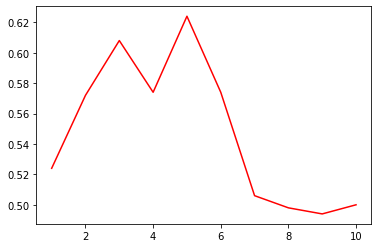

In [78]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epoch = range(1, len(acc) + 1) #정확도의 갯수

plt.plot(epoch, acc, c = 'red', label = 'Train acc') #훈련 데이터 정확도
plt.plot(epoch, val_acc, c = 'blue', label = 'Val acc') #검증 데이터 정확도
plt.legend() #범례
plt.plot()

In [ ]:
### CNN을 입력층으로 한 신경망

In [73]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
# Con2D : 특징찾기
# MAxPooling2D : 불필요한 부분 삭제
# Flatten : 데이터를 1차원으로 펴줌

In [67]:
c_model = Sequential()

#입력층 (CNN)
#특징을 도드라지게 해준다.

c_model.add(Conv2D(filters = 16, #사진에서 찾을 특성개수
                   kernel_size = (3,3), # 한번에 확인할 픽셀의 수
                   input_shape = (150,150,3), #입력 데이터의 크기
                   padding = 'same', #
                   activation = 'relu'))

c_model.add(MaxPooling2D(pool_size=(2,2)))

#1차원으로 데이터 축소
c_model.add(Flatten())

#은닉층
c_model.add(Dense(units=1, activation='sigmoid'))

#출력층
c_model.add(Dense(units=1, activation='sigmoid'))

c_model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f1b1ee36d10>>

In [70]:
c_model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

In [71]:
c_history = c_model.fit_generator(generator=train_generator,
                        steps_per_epoch=50,
                        epochs=10,
                        validation_data = val_generator,
                        validation_steps = 25)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
50/50 [==============================] - 10s 184ms/step - loss: 0.7071 - accuracy: 0.5040 - val_loss: 0.7058 - val_accuracy: 0.5000
Epoch 2/10
50/50 [==============================] - 8s 169ms/step - loss: 0.6955 - accuracy: 0.5300
Epoch 3/10
50/50 [==============================] - 9s 185ms/step - loss: 0.7003 - accuracy: 0.5080
Epoch 4/10
50/50 [==============================] - 8s 160ms/step - loss: 0.6989 - accuracy: 0.5060
Epoch 5/10
50/50 [==============================] - 7s 141ms/step - loss: 0.6953 - accuracy: 0.5160
Epoch 6/10
50/50 [==============================] - 7s 139ms/step - loss: 0.6965 - accuracy: 0.5060
Epoch 7/10
50/50 [==============================] - 7s 130ms/step - loss: 0.6958 - accuracy: 0.5040
Epoch 8/10
50/50 [==============================] - 6s 125ms/step - loss: 0.6978 - accuracy: 0.4840
Epoch 9/10
50/50 [==============================] - 7s 140ms/step - loss: 0.6989 - accuracy: 0.4580
Epoch 10/10
50/50 [==============================] - 7s 1

range(1, 11)

[0.5]